In [1]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

Notas:
--------
- [x] Estudiar Recency.__
    - [x] Histograma Row simple
    - [x] Probar esta función
    - [x] Implementar

##### Tarea anterior 

- [x] __Construir la variable Recency.__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Contruir Frecuency__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Construir Monetary__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar   

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [10]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Dicionario 
rename aplicado a `Precio promedio`

In [58]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

In [13]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_i_M`: Monetary 
- `Clientes_i_RFM`: RFM Clientes 

### Abrir Archivo   Facturaciones


Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### Formación Datos

###### Abrir csvs 

In [14]:
#======================================================================
# R
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT R'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_R = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('R',data_i_R.shape())


#======================================================================
# F
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT F'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_F = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('F',data_i_F.shape())
#======================================================================
# M
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT M'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_M = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('M',data_i_M.shape())



,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,0 days


###### Merge 

In [ ]:
#======================================================================
# RFM
#=====================================================================

print('RF',(pd.merge(data_i_R,data_i_F )).shape)

print('RFM',pd.merge(pd.merge(data_i_R,
                              data_i_F ) ,
                    data_i_M).shape)
DATA_i_RFM = pd.merge(pd.merge(data_i_R,data_i_F ),data_i_M)

del (data_i_R,data_i_F,data_i_M)

#### Funcion

###### def 

In [18]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_RFM(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

    
    
#=================================
# Proceso Recency a Int 
#=================================
        
    df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
    
#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
              ,'Frecuency_Row'
              ,'Monetary'
              ,'Ingreso de Venta CLP'
             ]:
        
        df[i]=df[i].astype('float64').astype('int64')
    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
#               ,'Frecuency_Row'
#               ,'Monetary'
               ,'Ingreso de Venta CLP'
             ]:
        df[i]=df[i].astype('int64')     



#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df


###### aplicación 

In [19]:
data_i_RFM=Ajuste_data_RFM(DATA_i_RFM)
data_i_RFM.head(2)

Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary                 int64
Recency días             int64
dtype: object
Time Lapsed = 0:0:1.8961198329925537 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Frecuency_Row,Ingreso de Venta CLP,Monetary,Recency días
0,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Especialista en Proc,2007,1010077,19,5,0 days,1,28600,0,0
1,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,...,Especialista en Crud,2007,1020253,464,3,0 days,1,129140,0,0


### Data Customers
 

#### abrir 

##### Abrir 

In [20]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Clientes_1010078_CT RFM'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Clientes_i_RFM= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Clientes_i_RFM.head(1)

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.0033444816053511705,22.0,1300.0,2007.0,19.0,28600.0


In [21]:
Clientes_i_RFM.iloc[1]

Cliente                                    10007508
Fecha ultima Compra                      2021-10-26
Recency Actual                                    0
Fecha Creacion                           2018-03-01
Frecuency Actual del Cliente     0.2017524296094161
Kilos Venta KG Promedio           93.15865384615384
Precio Promedio                  1266.8942307692307
Año Creación Promedio                        2007.0
Frecuencia Historica Promedio                 464.0
Ingreso de Venta Promedio        117683.47115384616
Name: 1, dtype: object

#### Función Ajuste 

###### def  `Ajuste_Clientes_RFM`

In [22]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_Clientes_RFM(data):
    start_time = time.time()
    df=data.copy()

# =============================================================================
# Proceso iterativo Pasar a numero
#------------------------------------------------------------------------------

#----------------------------------------------------------------------
# Float
    for i in [
            #RFM
            'Recency Actual'
            ,'Frecuency Actual del Cliente'
            ,'Ingreso de Venta Promedio'
              
            #Val Fact
            ,'Kilos Venta KG Promedio'
            ,'Precio Promedio'
            
            # Val historicos (ind del producto)
            ,'Año Creación Promedio'
            ,'Frecuencia Historica Promedio'
             ]:
        df[i]=df[i].astype('float64')
        #.astype('int64')
        
        
#------------------------------------------------------------------------ 
    # Int
    for i in [
                #RFM
                'Recency Actual'
#                 ,'Frecuency Actual del Cliente'
#                 ,'Ingreso de Venta Promedio'

                #Val Fact
#                 ,'Kilos Venta KG Promedio'
#                 ,'Precio Promedio'

                # Val historicos (ind del producto)
                ,'Año Creación Promedio'
                ,'Frecuencia Historica Promedio'
                ]:
        df[i]=df[i].astype('int64')
        


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    for date in ['Fecha ultima Compra','Fecha Creacion']:
        df[date] = df[date].apply(lambda x: 
                                            datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

##### Aplicación

In [23]:
Clientes_i_RFM=Ajuste_Clientes_RFM(Clientes_i_RFM)

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
Time Lapsed = 0:0:0.09108257293701172 
 H:m:s


In [24]:
Clientes_i_RFM.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


### Atributos de volumen 

###### Kilo promedio 

In [25]:
df= data_i_RFM
df_g=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .mean().reset_index()\
        .rename(columns={'Kilos Venta KG':Dic_col['Ticket Customers'][0]})
df_g

,Cliente,Ticket Promedio Actual
0,10003742,22.000000
1,10007508,93.158654
2,10017269,22.038462
3,10023880,27.500000
4,10028999,22.000000
...,...,...
5068,9992154,36.171429
5069,9993925,160.517495
5070,9994662,22.000000
5071,9994800,22.000000


##### CV

######  Std

In [26]:
df_G=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .std().reset_index()\
        .rename(columns={'Kilos Venta KG':'Ticket std Actual'})
print(
df_G.isnull().sum()
)
df_G=df_G.fillna(0)
df_G.head()

Cliente                0
Ticket std Actual    367
dtype: int64


,Cliente,Ticket std Actual
0,10003742,0.000000
1,10007508,36.215256
2,10017269,0.612474
3,10023880,12.102631
4,10028999,0.000000


###### Coeficiente de variación 

In [27]:
df_group=pd.merge(df_g,df_G,how='right')

df_group[Dic_col['Ticket Customers'][1]]=\
df_group.apply(lambda x: 
               x['Ticket std Actual']/
               x[Dic_col['Ticket Customers'][0]] ,axis=1)
df_group

,Cliente,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual
0,10003742,22.000000,0.000000,0.000000
1,10007508,93.158654,36.215256,0.388748
2,10017269,22.038462,0.612474,0.027791
3,10023880,27.500000,12.102631,0.440096
4,10028999,22.000000,0.000000,0.000000
...,...,...,...,...
5068,9992154,36.171429,18.376080,0.508027
5069,9993925,160.517495,81.963154,0.510618
5070,9994662,22.000000,0.000000,0.000000
5071,9994800,22.000000,0.000000,0.000000


In [37]:
Dic_col['RFM Customers'][1]

'Frecuency Actual del Cliente'

#### Merge 

In [38]:
Clientes_i=pd.merge(Clientes_i_RFM,df_group)
Clientes_i['$F^{-1}$ Actual']=Clientes_i[Dic_col['RFM Customers'][1]].apply( lambda x: x**(-1))
Clientes_i.shape

(5073, 14)

In [33]:
0.201752**-1

4.956580356080733

In [39]:
Clientes_i.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334


# Analisis 

##### CV Lote 

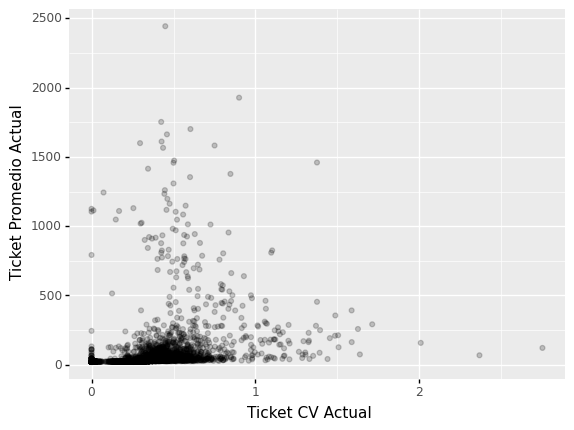

<ggplot: (156732887902)>

In [42]:
Y_Graph=Dic_col['Ticket Customers'][0]
X_Graph=Dic_col['Ticket Customers'][1]
(ggplot(Clientes_i,
      aes(x=X_Graph,
         y=Y_Graph
#          ,color='Cliente'
         )
      )
+geom_point(alpha=0.2)
)

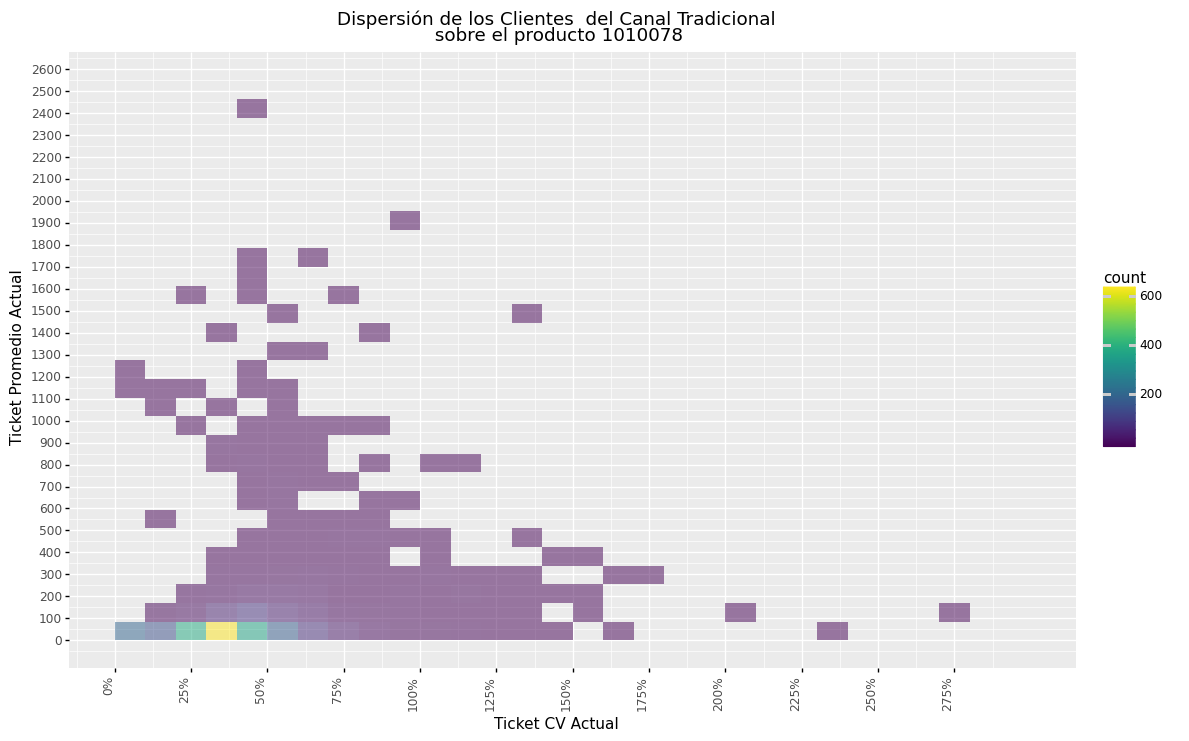

<ggplot: (156735051002)>

In [43]:
df=Clientes_i.copy()
Y_Graph=Dic_col['Ticket Customers'][0]
X_Graph=Dic_col['Ticket Customers'][1]
# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
+scale_y_continuous(limits=(0,2550)
                    ,breaks=[i for i in range(0,2700,100)]
                   )
+scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
                    ,limits=(0,3)
                    ,breaks=[i/100 for i in range(0,300,25)]
                   )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

In [50]:
(Clientes_i.columns)[13]

'$F^{-1}$ Actual'

###### F.-1 CV 

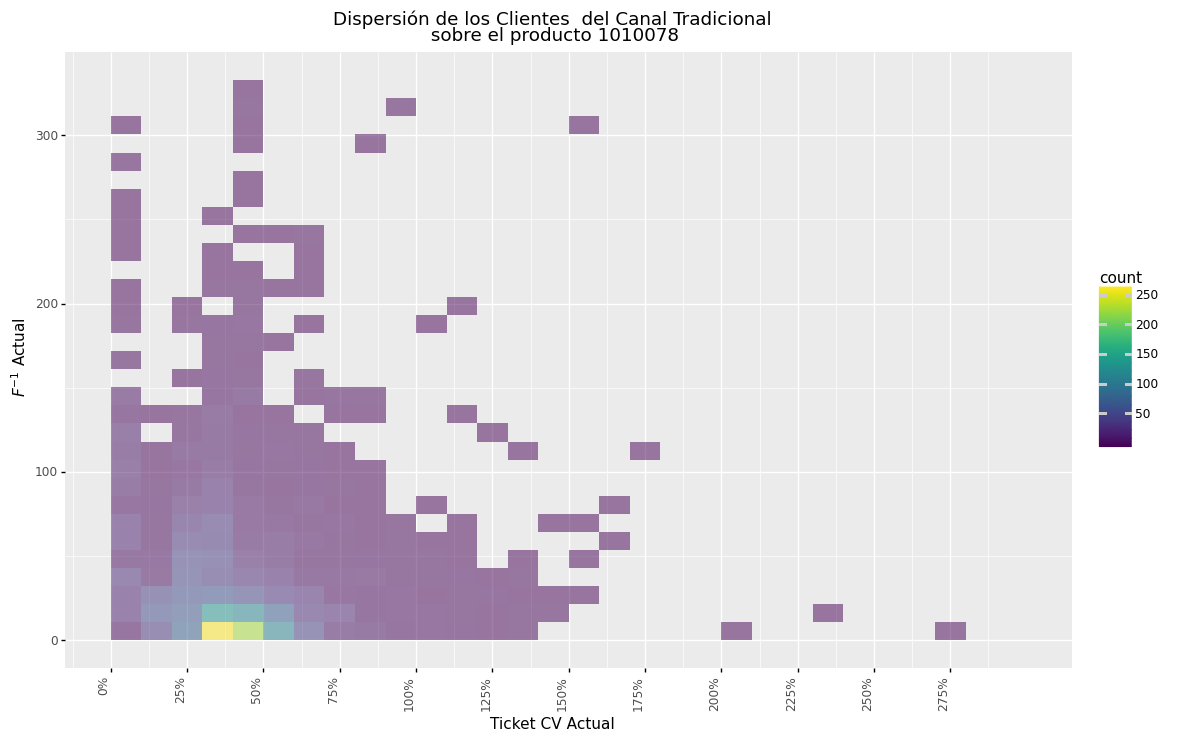

<ggplot: (156735240837)>

In [51]:
df=Clientes_i.copy()
Y_Graph=(Clientes_i.columns)[13]
# Dic_col['RFM Customers'][1]
X_Graph=Dic_col['Ticket Customers'][1]
# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
+scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
                    ,limits=(0,3)
                    ,breaks=[i/100 for i in range(0,300,25)]
                   )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

##### RFM

###### f-1 Rece 

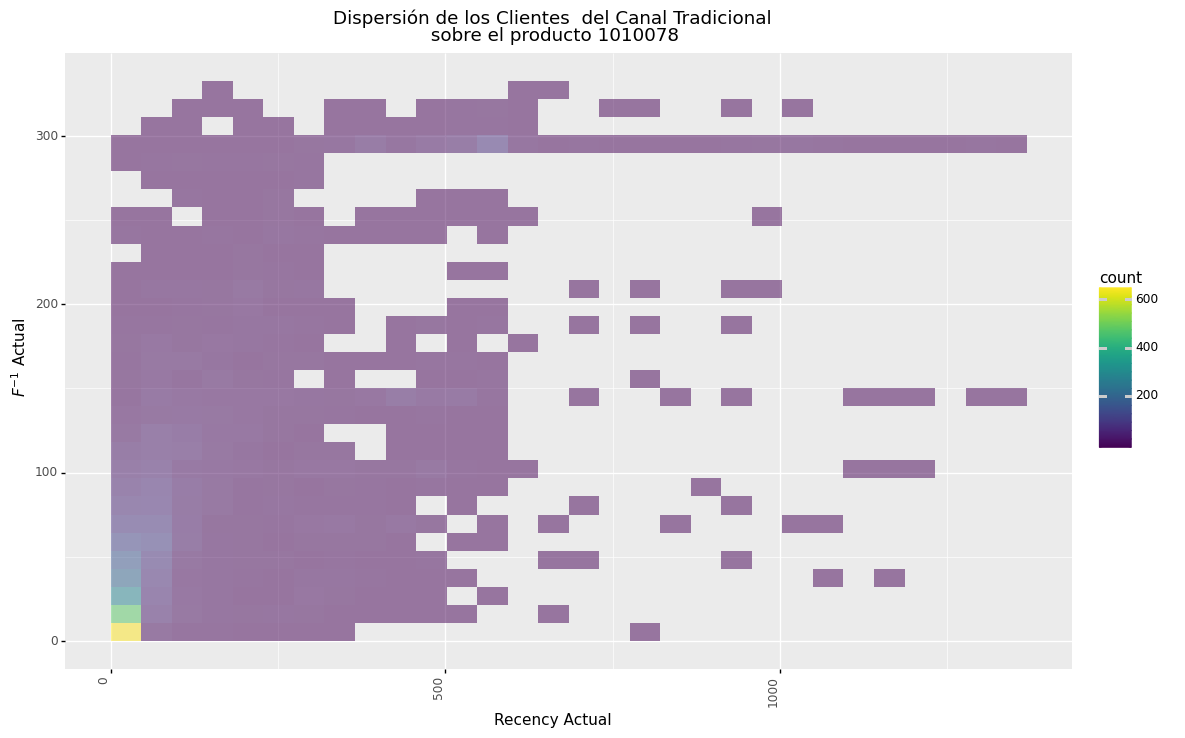

<ggplot: (156735236868)>

In [53]:
df=Clientes_i.copy()
Y_Graph=(Clientes_i.columns)[13]
# Dic_col['RFM Customers'][1]
X_Graph= Dic_col['RFM Customers'][0]
# Dic_col['Ticket Customers'][1]



# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

###### F-1 Mon 

In [55]:
Clientes_i

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,9992154,2021-08-18,69,2018-10-03,0.056885,36.171429,1294.657143,2007,113,46135.600000,36.171429,18.376080,0.508027,17.579468
5069,9993925,2021-10-26,0,2018-01-02,0.408158,160.517495,1257.278085,2012,594,200374.351750,160.517495,81.963154,0.510618,2.450031
5070,9994662,2021-10-14,12,2020-02-10,0.015996,22.000000,1304.545455,2007,37,28700.000000,22.000000,0.000000,0.000000,62.515629
5071,9994800,2021-06-30,118,2020-12-16,0.025931,22.000000,1230.000000,2020,7,27060.000000,22.000000,0.000000,0.000000,38.563750


In [59]:
'Ingreso de Venta Promedio'
Dic_col['RFM Customers'][2]

'Monetary Actual'

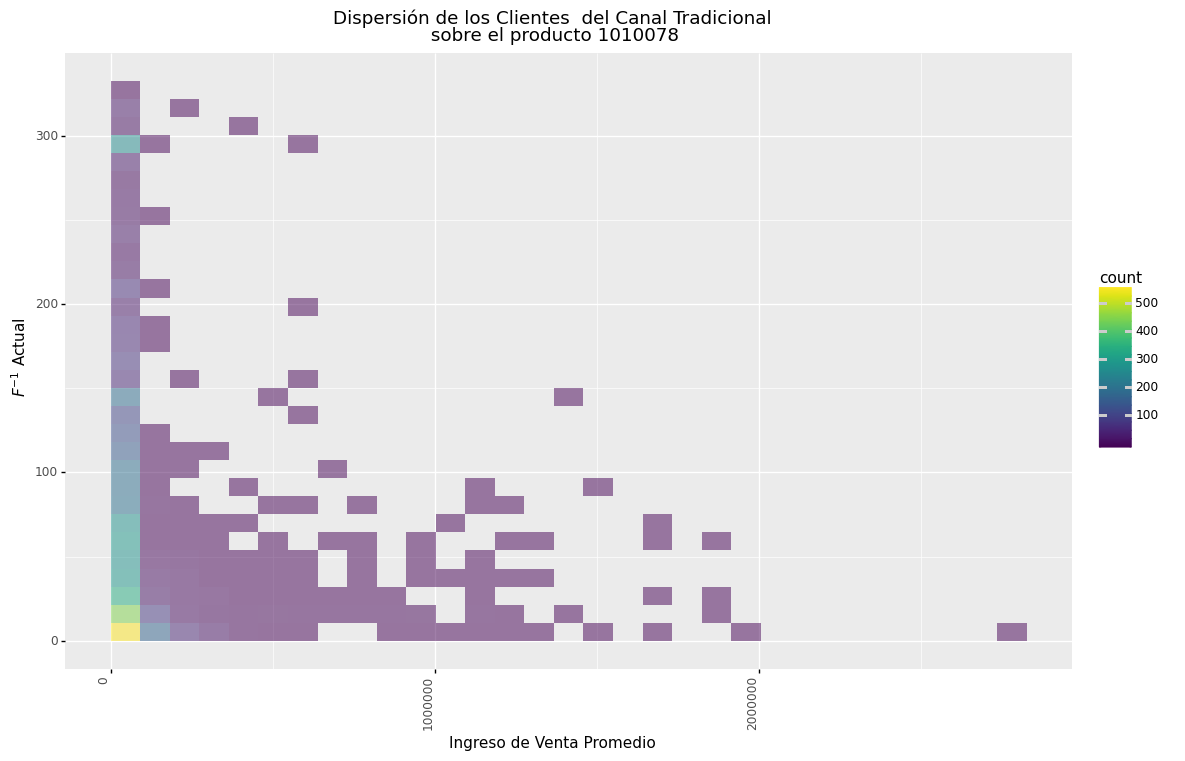

<ggplot: (156735708148)>

In [60]:
df=Clientes_i.copy()
Y_Graph=(Clientes_i.columns)[13]
# Dic_col['RFM Customers'][1]
X_Graph= 'Ingreso de Venta Promedio'
# Dic_col['RFM Customers'][2]
# Dic_col['Ticket Customers'][1]



# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

In [61]:
Clientes_i.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Ingreso de Venta Promedio',
       'Ticket Promedio Actual', 'Ticket std Actual', 'Ticket CV Actual',
       '$F^{-1}$ Actual'],
      dtype='object')

##### Precio 

###### F-1 

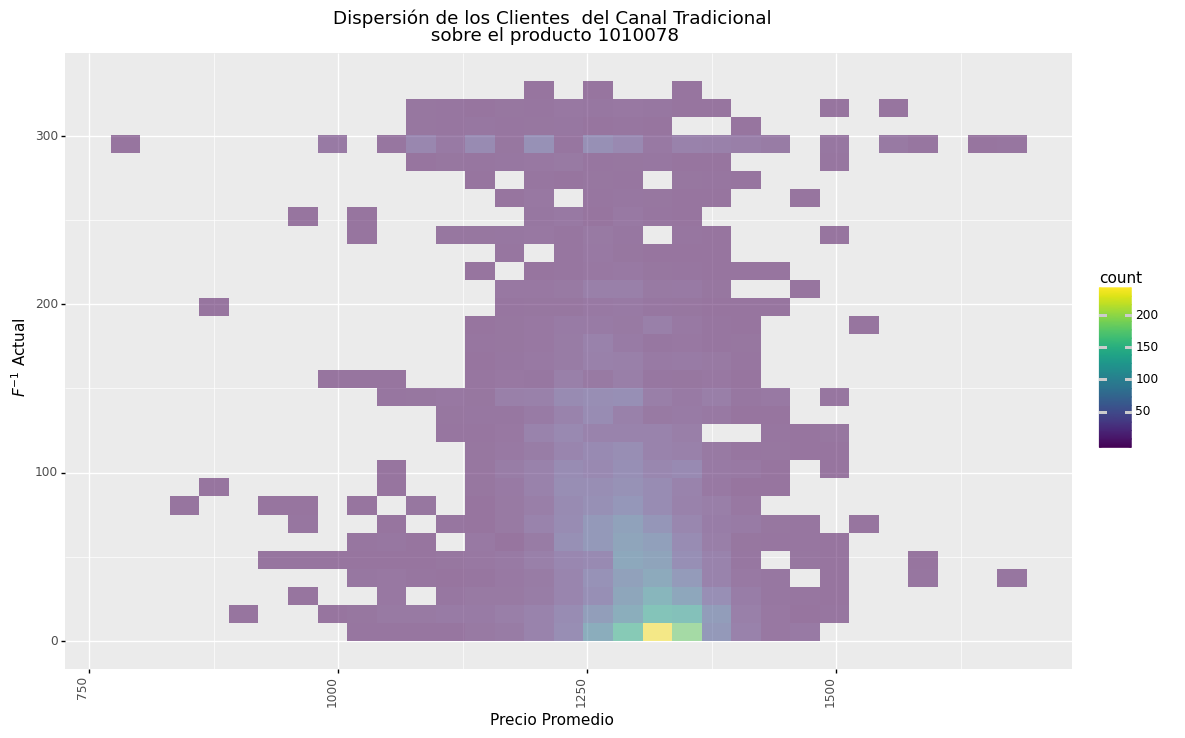

<ggplot: (156736164756)>

In [62]:
df=Clientes_i.copy()
Y_Graph=(Clientes_i.columns)[13]
# Dic_col['RFM Customers'][1]
X_Graph= 'Precio Promedio'
# 'Ingreso de Venta Promedio'
# Dic_col['RFM Customers'][2]
# Dic_col['Ticket Customers'][1]



# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

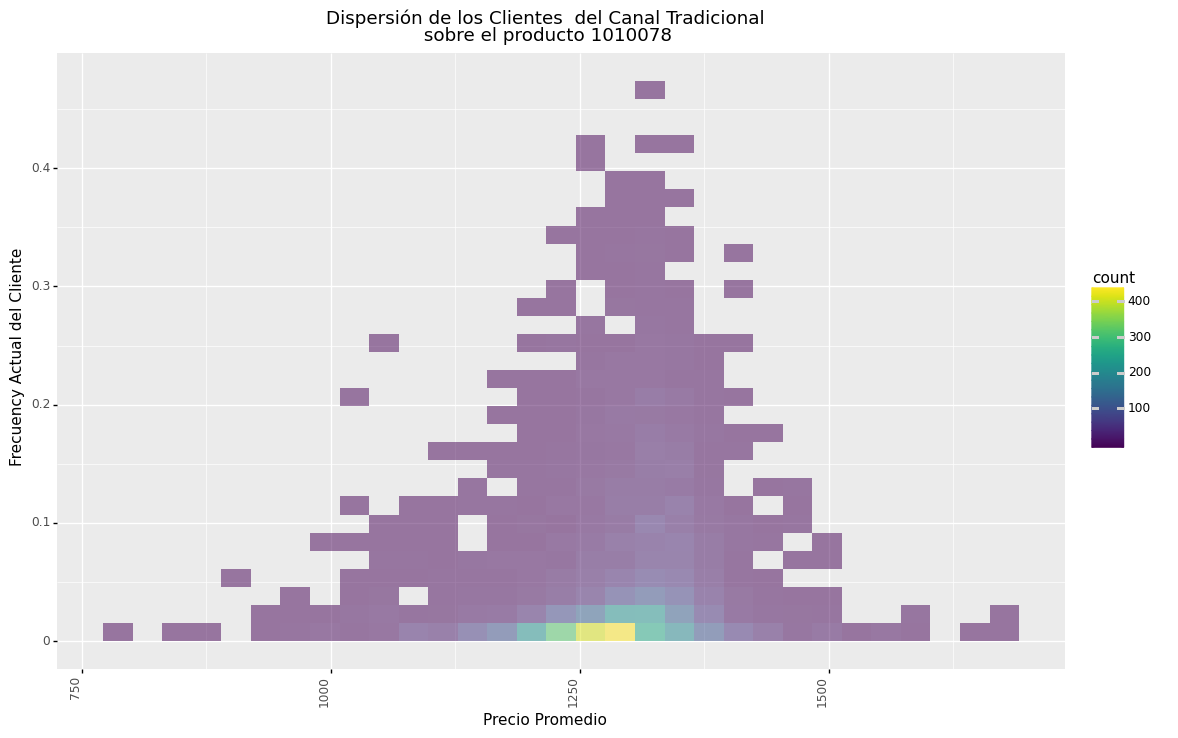

<ggplot: (156736197572)>

In [63]:
df=Clientes_i.copy()
Y_Graph= Dic_col['RFM Customers'][1]
# (Clientes_i.columns)[13]
X_Graph= 'Precio Promedio'
# 'Ingreso de Venta Promedio'
# Dic_col['RFM Customers'][2]
# Dic_col['Ticket Customers'][1]



# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

###### R

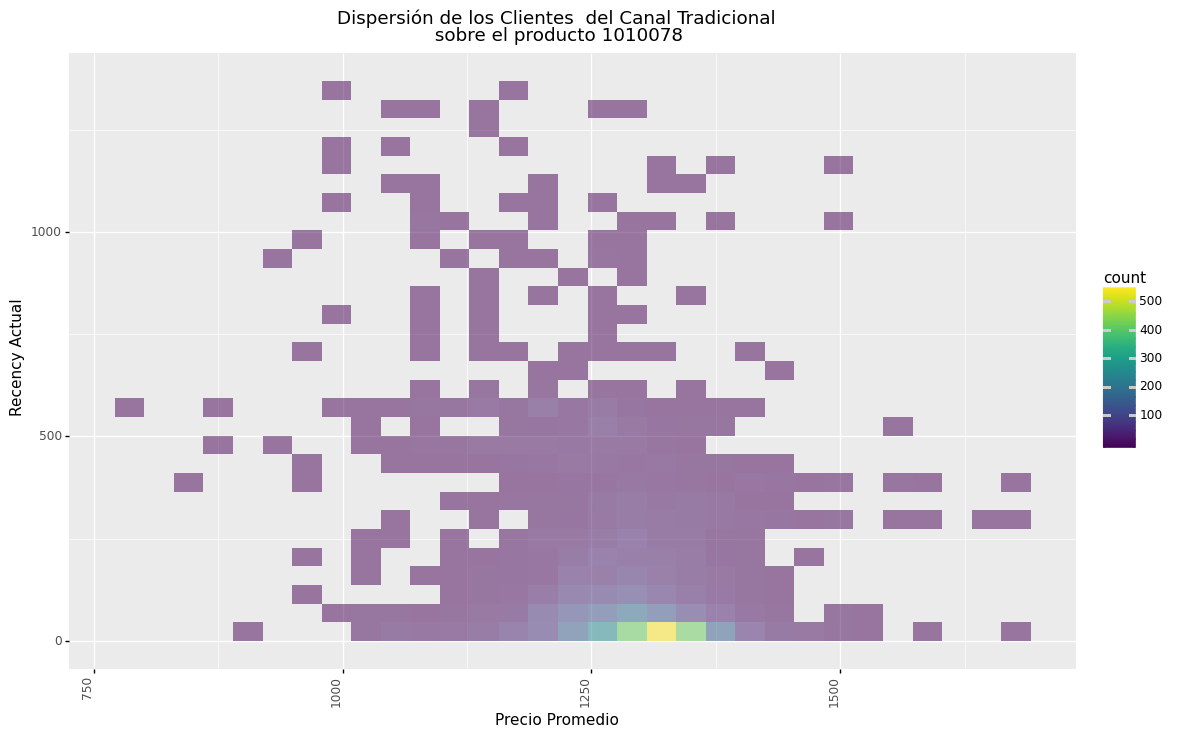

<ggplot: (156736246842)>

In [64]:
df=Clientes_i.copy()
Y_Graph= Dic_col['RFM Customers'][0]
# (Clientes_i.columns)[13]
X_Graph= 'Precio Promedio'
# 'Ingreso de Venta Promedio'
# Dic_col['RFM Customers'][2]
# Dic_col['Ticket Customers'][1]



# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

###### Fact 

In [68]:
df=data_i_RFM.copy()
Y_Graph= Dic_col['RFM Row'][0]
# (Clientes_i.columns)[13]
X_Graph=  Dic_col['RFM Row'][1]
# 'Precio'
# 'Ingreso de Venta Promedio'
# Dic_col['RFM Customers'][2]
# Dic_col['Ticket Customers'][1]

df=df[df[Dic_col['RFM Row'][1]]<1]

# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
# +scale_y_continuous(limits=(0,2550)
#                     ,breaks=[i for i in range(0,2700,100)]
#                    )
# +scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
#                     ,limits=(0,3)
#                     ,breaks=[i/100 for i in range(0,300,25)]
#                    )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

C:\Users\user\anaconda3\lib\site-packages\mizani\utils.py:50: RuntimeWarning: invalid value encountered in true_divide


ValueError: arange: cannot compute length